In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
from conrad import *

optkit backend set to cpu64


In [3]:
# construct bare case
case = Case()

In [4]:
# populate case anatomy
# add structures using initialization Structure(label, name, is_target)
case.anatomy += Structure(0, 'target', True)
case.anatomy += Structure(1, 'avoid', False)

In [5]:
# populate case physics
# generate random dose influence matrix, 1000 voxels x 200 beams
case.physics.dose_matrix = np.random.rand(1000, 200)

# randomly label voxels as 0 (tumor, ~20% of voxels) or 1 (avoid, ~80% of voxels) 
case.physics.voxel_labels = (np.random.rand(1000) > 0.2).astype(int)

# doctor random dose matrix so that target voxels receive (on average) 3x radiation of non-target
FACTOR = 3
for i, label in enumerate(case.physics.voxel_labels):
    if label == 0:
        case.physics.dose_matrix[i, :] *= FACTOR

In [6]:
# solve case with no DVH constraints
status, run = case.plan()

# print status:
print('SOLVER CONVERGED?', status)

('SOLVER CONVERGED?', True)


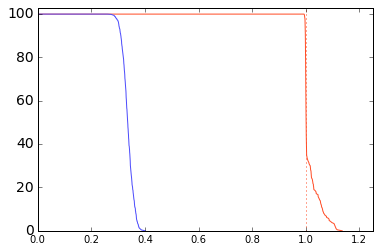

In [7]:
# plot output
# initialize CasePlotter object
graphics = CasePlotter(case)

# plot data from run
graphics.plot(run)